# データの読み取り

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# PDの日本語フォントをサポート
# plt.rcParams['font.family'] = 'Gothic'

# Macの日本語フォントをサポート
plt.rcParams['font.family'] = 'Hiragino Sans'

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


# 1900年から2020年までの災害（洪水、地震、台風）のごとの発生件数

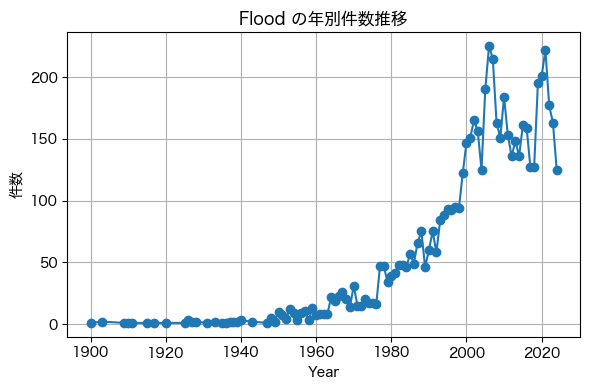

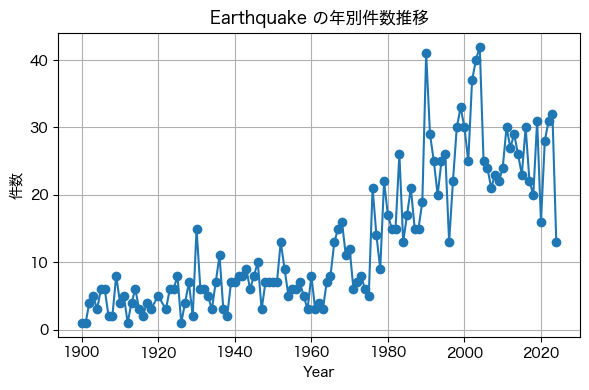

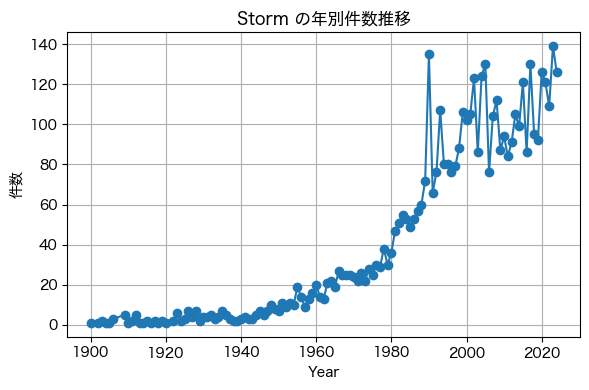

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")
df["Start Year"] = df["Start Year"].astype(int)

def plot_disaster_trend(df, disaster_type):
    subset = df[df["Disaster Type"] == disaster_type]
    yearly = subset.groupby("Start Year").size()

    plt.figure(figsize=(6, 4))
    plt.plot(yearly.index, yearly.values, marker="o")
    plt.title(f"{disaster_type} の年別件数推移")
    plt.xlabel("Year")
    plt.ylabel("件数")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_disaster_trend(df, "Flood")

target_disasters = [ "Earthquake", "Storm"]
for d in target_disasters:
    plot_disaster_trend(df, d)


# このように年別で災害件数を示すことで年々増えていることがわかる。

# 国ごとの災害タイプと発生件数

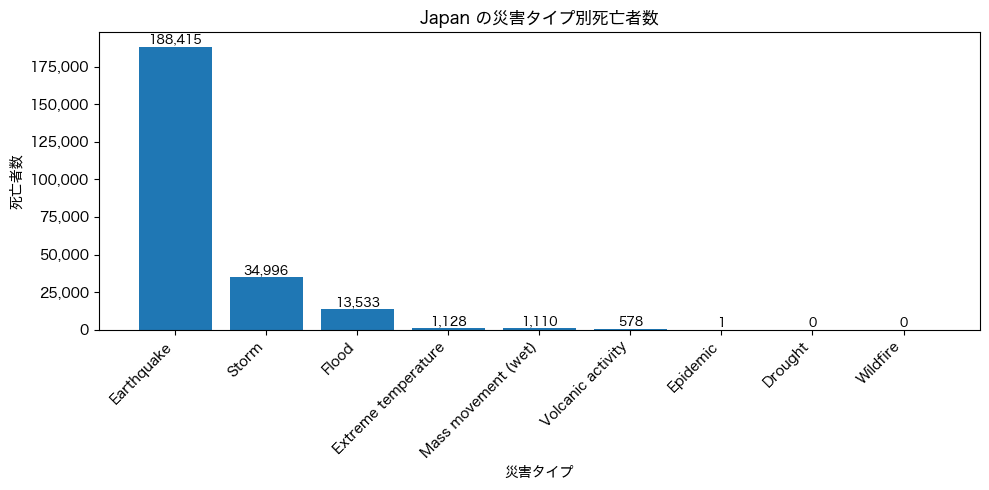

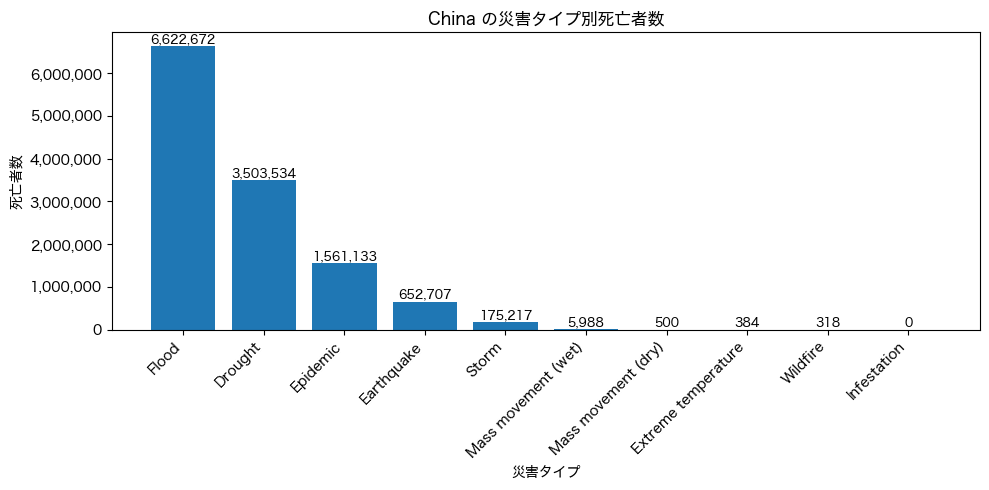

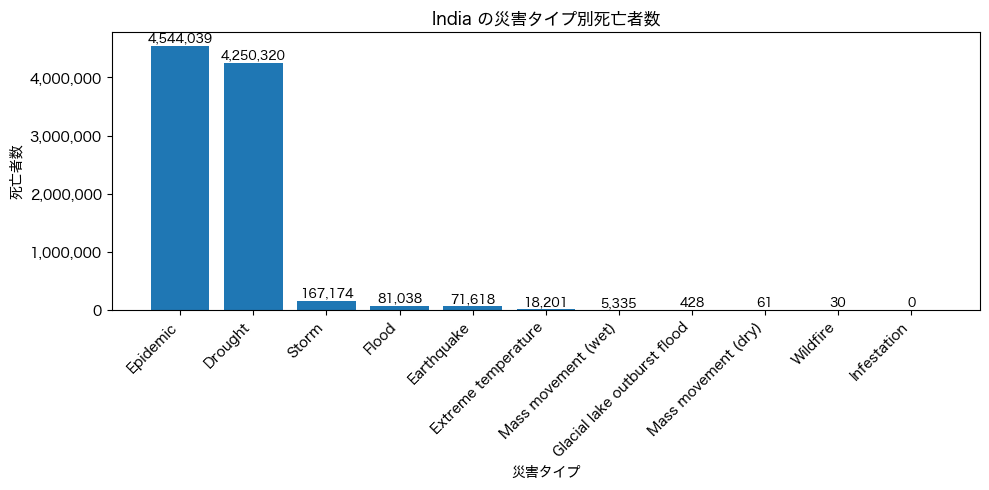

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- データ読み込み ----
df = pd.read_csv("emdat.csv")

# 数値型にしておく
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], errors="coerce").fillna(0)


# =====================================================
# ① 自作関数：指定した国の災害タイプ別死亡者数を可視化
# =====================================================
def plot_country_disaster_deaths(df, country):
    """
    指定した国の災害タイプ別の合計死亡者数を棒グラフで可視化する関数
    """
    # 国でフィルタ
    country_df = df[df["Country"] == country]

    # 災害タイプごとの死亡者数合計
    summary = country_df.groupby("Disaster Type")["Total Deaths"].sum().sort_values(ascending=False)

    # グラフ作成
    plt.figure(figsize=(10, 5))
    bars = plt.bar(summary.index, summary.values)

    plt.title(f"{country} の災害タイプ別死亡者数")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.xticks(rotation=45, ha="right")

    # y軸目盛りにカンマ区切り
    plt.gca().get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, _: f"{int(x):,}")
    )

    # 棒の上に数値ラベル
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


# =====================================================
# ② 関数のサンプル実行（例：Japan）
# =====================================================
plot_country_disaster_deaths(df, "Japan")


# =====================================================
# ③ for ループで複数の国を自動可視化
# =====================================================
country_list = [ "China", "India"]

for c in country_list:
    plot_country_disaster_deaths(df, c)


# 国ごとにデータを出すことでどの国が何の災害が多いのかを知ることができる。

# 感想
このようにいくつかの表を出して比べることで可視化の質をあげることができると思いました。